# Bank Marketing

## Description of the data

### Input features:

#### bank client data:
  1. age (numeric)
  2. job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"
  3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
  4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  5. default: has credit in default? (categorical: "no","yes","unknown")
  6. housing: has housing loan? (categorical: "no","yes","unknown")
  7. loan: has personal loan? (categorical: "no","yes","unknown")

#### related with the last contact of the current campaign:
  8. contact: contact communication type (categorical: "cellular","telephone") 
  9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

#### social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
  21. y - has the client subscribed a term deposit? (binary: "yes","no")

### Goal
 The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

## Exploratory Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
from plotnine import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

In [3]:
# define a plotting function
def plot_group_ratio(df, col):
    a = df['y'].groupby([df[col], df['y']]).count().unstack(fill_value=0).stack()/df['y'].groupby(df[col]).count()
    b = df['y'].groupby([df[col], df['y']]).count().unstack(fill_value=0).stack()
    c = pd.concat([a,b], axis=1).reset_index().rename(columns={0:'ratio', 1: 'total'})
    dodge_text = position_dodge(width=0.9)

    f = ggplot(c, aes(x=col, y='ratio', fill='y'))
    f += geom_bar(stat='identity', position='dodge', show_legend=True)
    f += geom_text(aes(label='ratio'),                                    
                 position=dodge_text,
                 size=8, va='bottom', format_string='{:.2f}%')
    f += coord_flip()
    print(f)

### Descriptive Statistics

In [4]:
df.shape

(41188, 21)

In [5]:
df = df.drop_duplicates()
df.shape

(41176, 21)

In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Features

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

#### Numeric features

In [10]:
df.select_dtypes(include=['number']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')

In [11]:
for c in df.select_dtypes(include=['number']).columns:
    print(c, '\t' ,df[c].nunique())

age 	 78
duration 	 1544
campaign 	 42
pdays 	 27
previous 	 8
emp.var.rate 	 10
cons.price.idx 	 26
cons.conf.idx 	 26
euribor3m 	 316
nr.employed 	 11


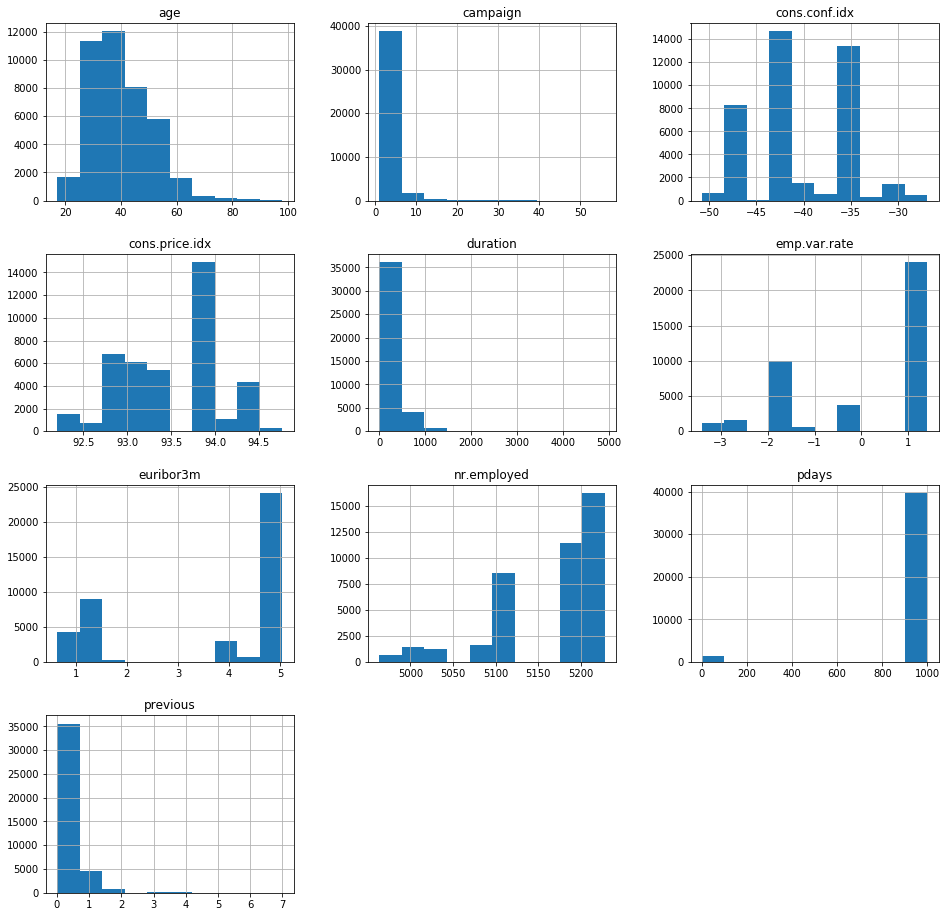

In [12]:
df.hist(figsize=(16, 16))
plt.show()

##### Cleaning

In [13]:
#Comparing number of entries for 'poutcome' and 'pdays'
df.pdays.value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [14]:
df.poutcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [15]:
df.previous.value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [16]:
# remove mistakenly labeled pday=999
len(df.loc[(df['pdays'] == 999) & (df['poutcome'] != 'nonexistent')])

4110

In [17]:
len(df[~((df['pdays'] == 999) & (df['poutcome'] != 'nonexistent'))])

37066

In [18]:
df = df[~((df['pdays'] == 999) & (df['poutcome'] != 'nonexistent'))]

In [19]:
df['y'].groupby([df['pdays']]).count()

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    35551
Name: y, dtype: int64

In [20]:
# check the ratios to see if we can combine some bins
df['y'].groupby([df['pdays'], df['y']]).count()/df['y'].groupby([df['pdays']]).count()

pdays  y  
0      no     0.333333
       yes    0.666667
1      no     0.692308
       yes    0.307692
2      no     0.393443
       yes    0.606557
3      no     0.321185
       yes    0.678815
4      no     0.466102
       yes    0.533898
5      no     0.369565
       yes    0.630435
6      no     0.298544
       yes    0.701456
7      no     0.333333
       yes    0.666667
8      no     0.333333
       yes    0.666667
9      no     0.453125
       yes    0.546875
10     no     0.423077
       yes    0.576923
11     no     0.464286
       yes    0.535714
12     no     0.551724
       yes    0.448276
13     no     0.222222
       yes    0.777778
14     no     0.450000
       yes    0.550000
15     no     0.333333
       yes    0.666667
16     no     0.454545
       yes    0.545455
17     no     0.750000
       yes    0.250000
18     no     0.428571
       yes    0.571429
19     no     0.666667
       yes    0.333333
20     no     1.000000
21     yes    1.000000
22     no     0.333333


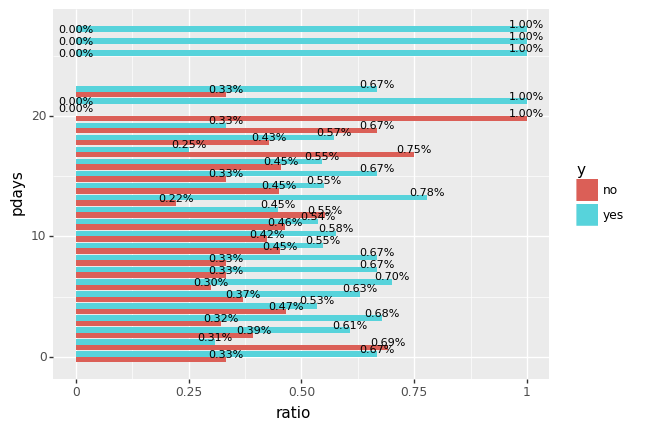

<ggplot: (-9223363247676697775)>


In [21]:
plot_group_ratio(df[df['pdays']<999], 'pdays')

In [22]:
# we can  create a new variable "previous_contact" also drop pdays
df['previous_contact'] = np.where(df['pdays']!=999, 1, 0)
# df['previous_contact'] = df['previous_contact'].astype('category')

In [23]:
exclude_from_numeric = ['pdays', 'duration', 'y_dummy']
print([c for c in df.select_dtypes(include=['number']).columns if c not in exclude_from_numeric])

['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'previous_contact']


In [24]:
numeric_features_lst = ['age', 
                    'campaign',
                    'previous',
                    'emp.var.rate',
                    'cons.price.idx',
                    'cons.conf.idx',
                    'euribor3m',
                    'nr.employed']
numeric_features = df[numeric_features_lst].columns

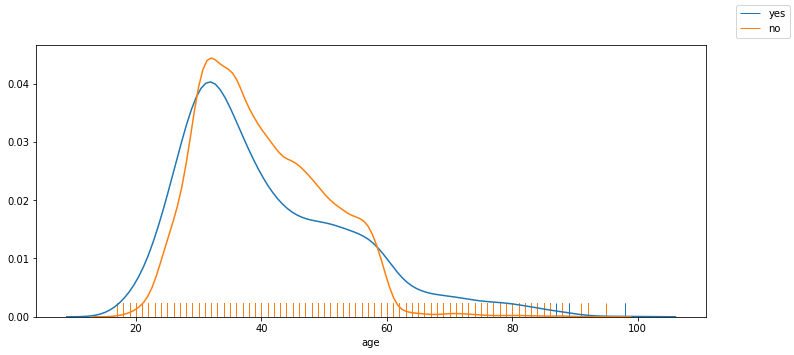

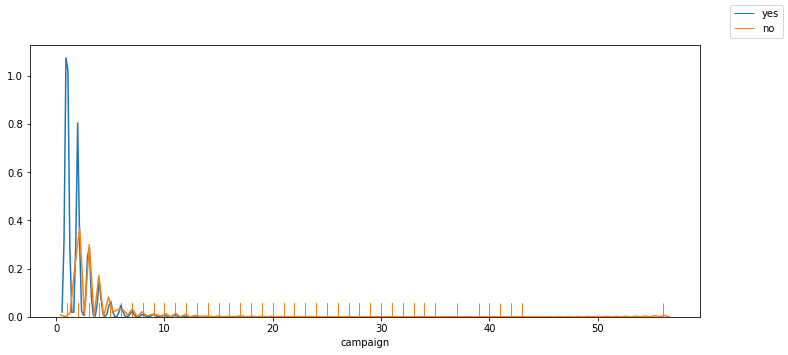

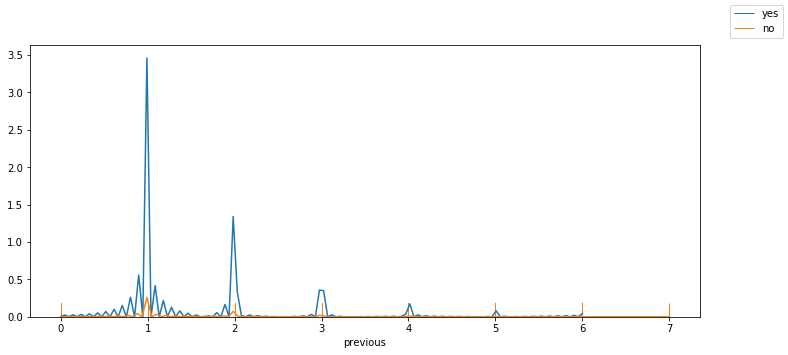

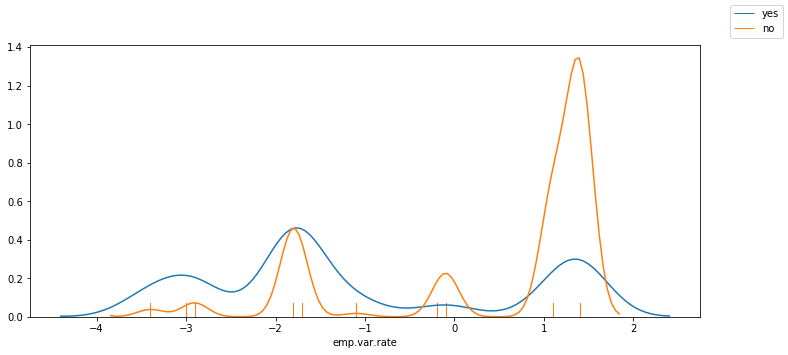

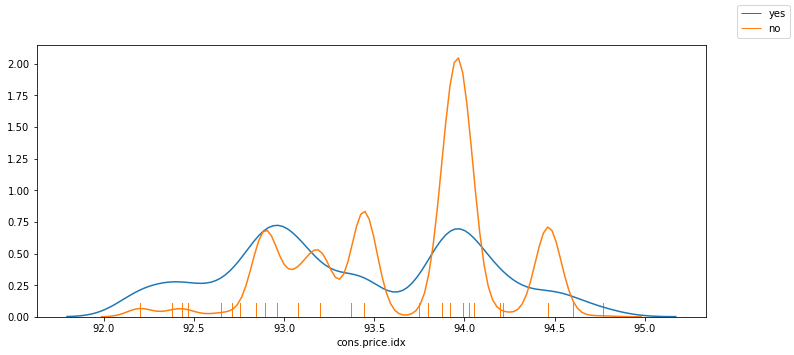

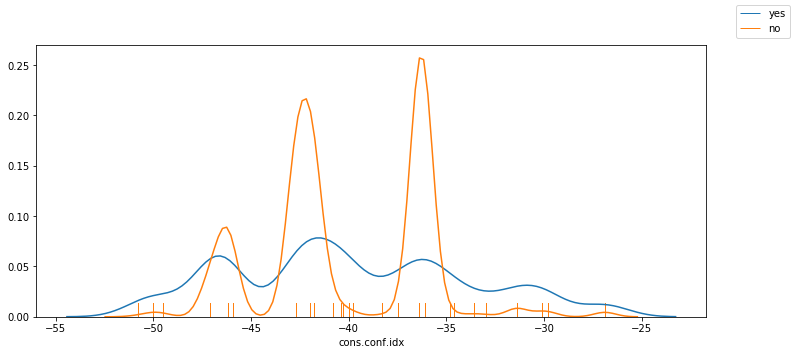

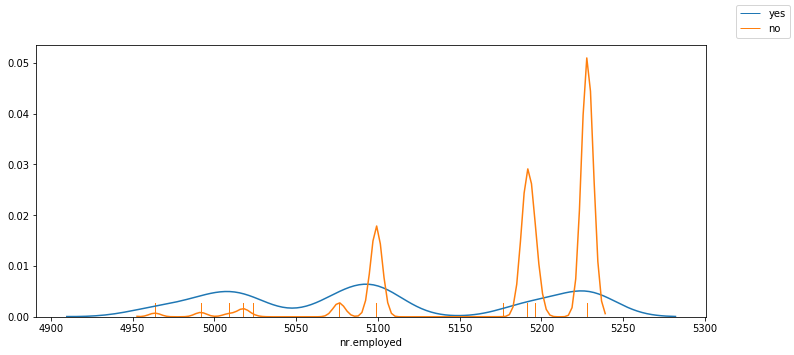

In [91]:
for col in numeric_features:
    fig = plt.figure(figsize=[12,5])
    sns.distplot(df[df['y']=='yes'][col], rug=True, hist=False)
    sns.distplot(df[df['y']=='no'][col], rug=True, hist=False)
    fig.legend(labels=['yes','no'])
    plt.show()

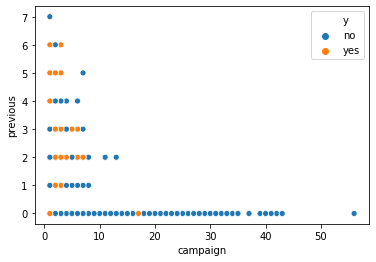

In [97]:
sns.scatterplot(x="campaign", y="previous", data=df, hue='y')

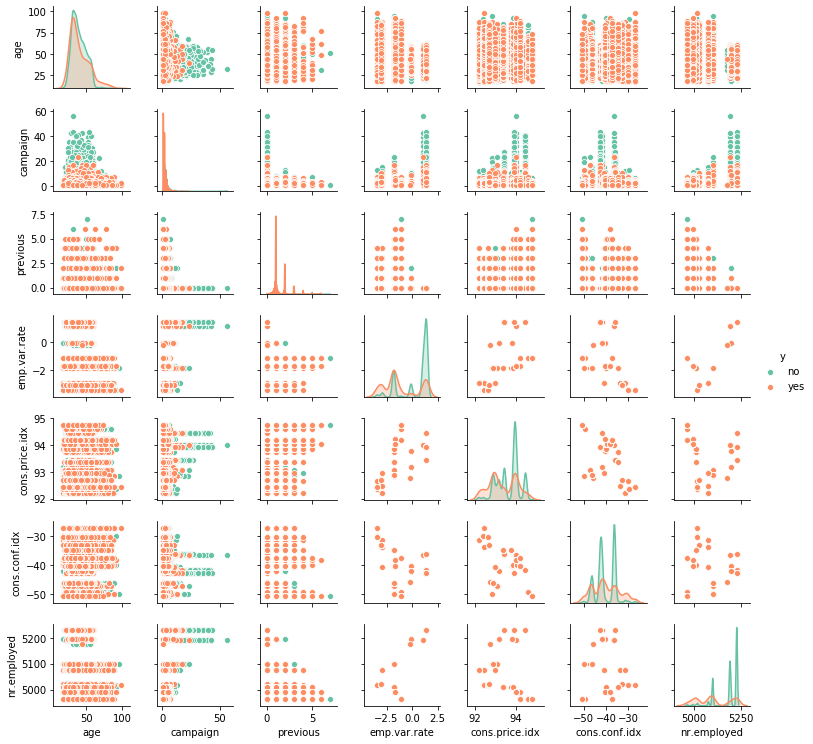

In [100]:
lst = [c for c in numeric_features]
lst.append('y')
sns.pairplot(df[lst], hue='y', palette="Set2", height=1.5)

Here "campain" is an intresting variable. By increasing number of contacts, there is chance that such person will open open an account, specillay in middle ages. This is also intresting that we investivate and model the P(y|campian=0,1,2,...)

#### Categorical features

Categorical features are divided into Oridinal features and Nominal features. In Ordinal features, the value has some meaningfull order. For example in `poutcome`, `succes` is higher than failure. But in nominal variables order doesn't matter.

In [25]:
df.select_dtypes(exclude=['number']).drop(['y'], axis=1).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], dtype='object')

In [26]:
categorical_features_lst = ['job',
                        'marital',
                        'education',
                        'default',
                        'housing',
                        'loan',
                        'contact',
                        'month',
                        'day_of_week',
                        'poutcome',
                        'previous_contact']
categorical_features = df[categorical_features_lst].columns

In [27]:
for c in categorical_features:
    print(c, ": ", df[c].unique().tolist())

job :  ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital :  ['married', 'single', 'divorced', 'unknown']
education :  ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default :  ['no', 'unknown', 'yes']
housing :  ['no', 'yes', 'unknown']
loan :  ['no', 'yes', 'unknown']
contact :  ['telephone', 'cellular']
month :  ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week :  ['mon', 'tue', 'wed', 'thu', 'fri']
poutcome :  ['nonexistent', 'success', 'failure']
previous_contact :  [0, 1]


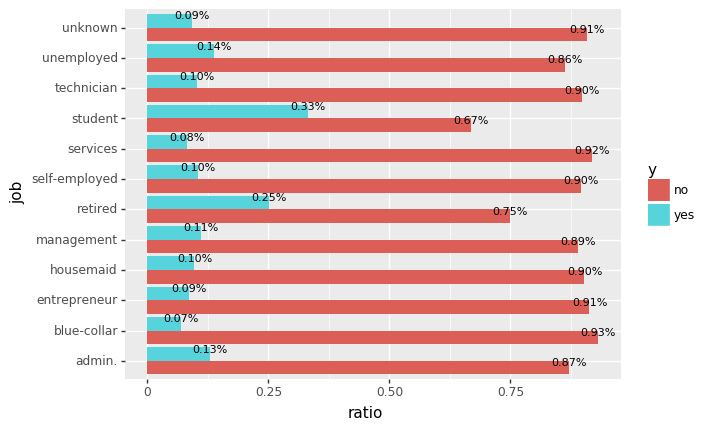

<ggplot: (8789178104303)>


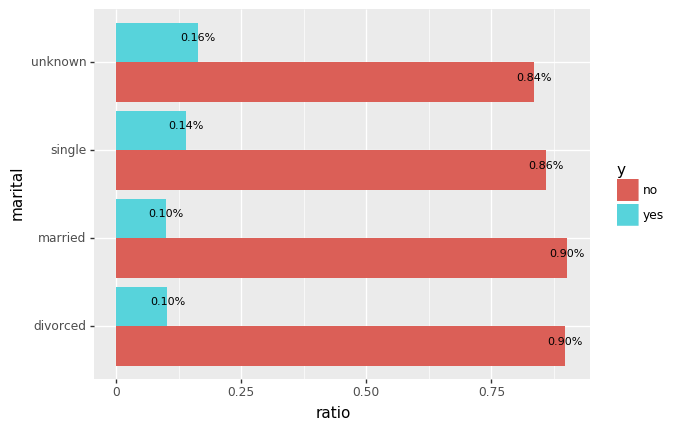

<ggplot: (-9223363247677523561)>


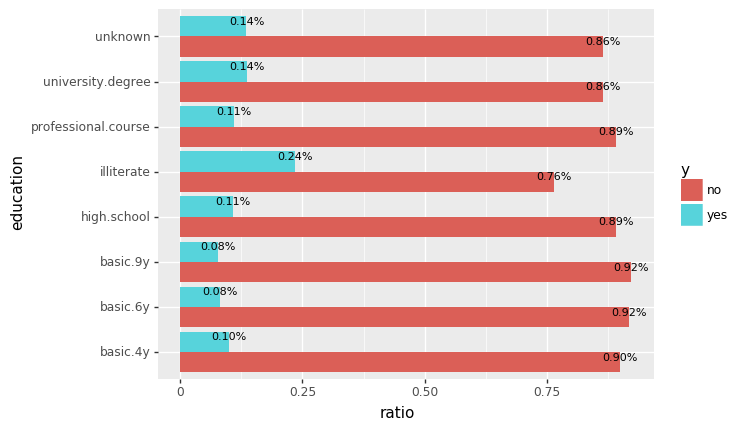

<ggplot: (-9223363247677462896)>


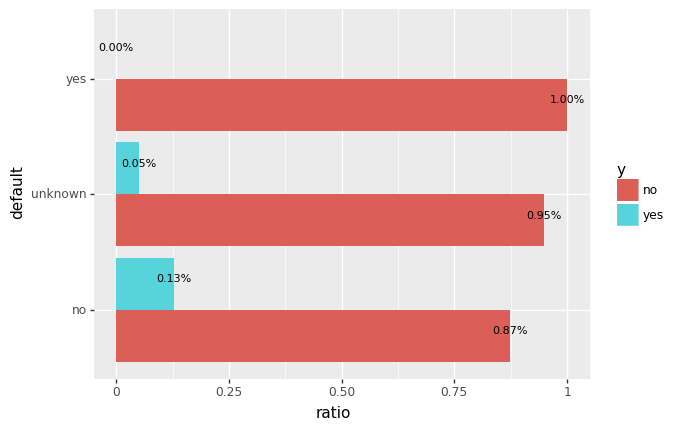

<ggplot: (-9223363247676671586)>


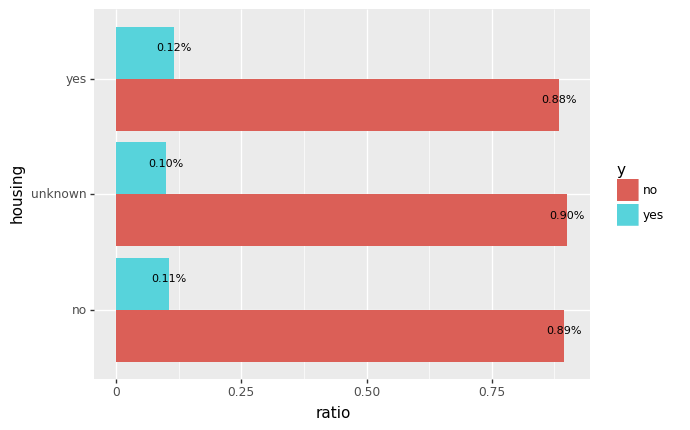

<ggplot: (8789177217572)>


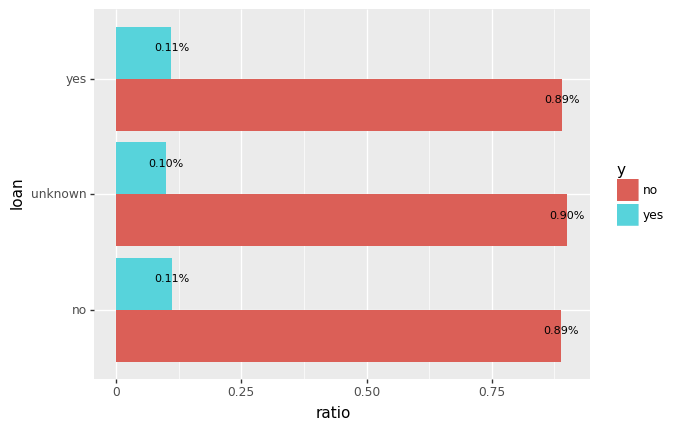

<ggplot: (8789178113512)>


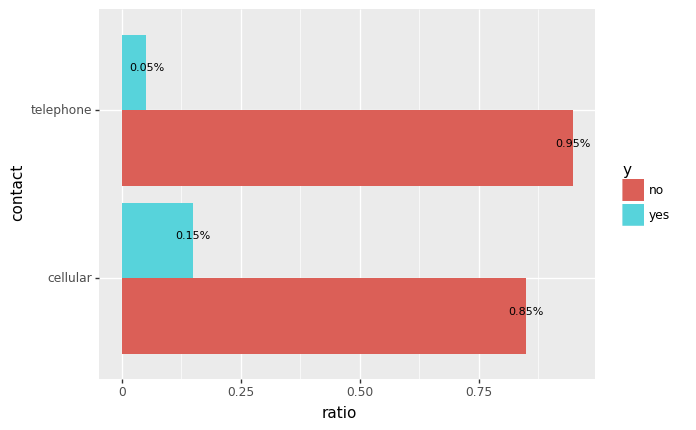

<ggplot: (8789177789455)>


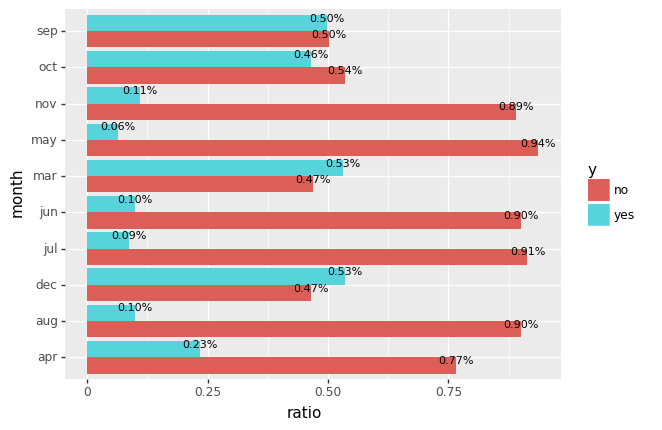

<ggplot: (8789177789455)>


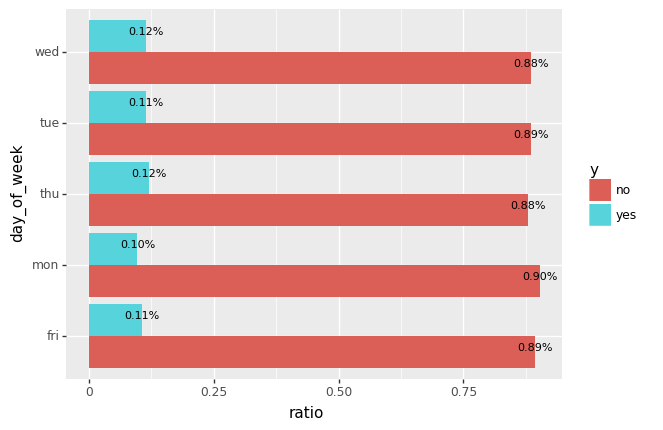

<ggplot: (8789178237462)>


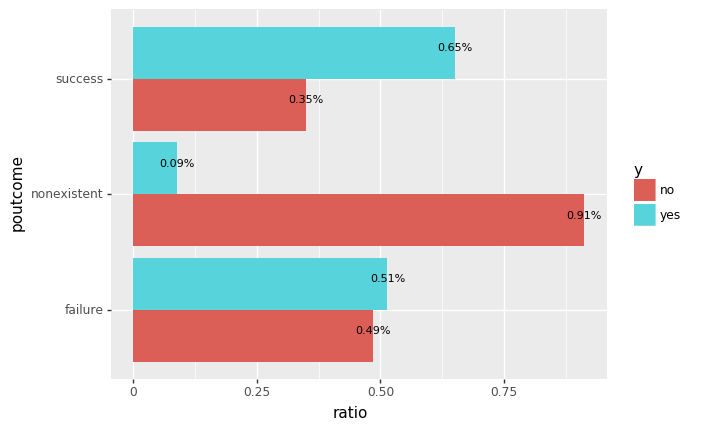

<ggplot: (-9223363247676554338)>


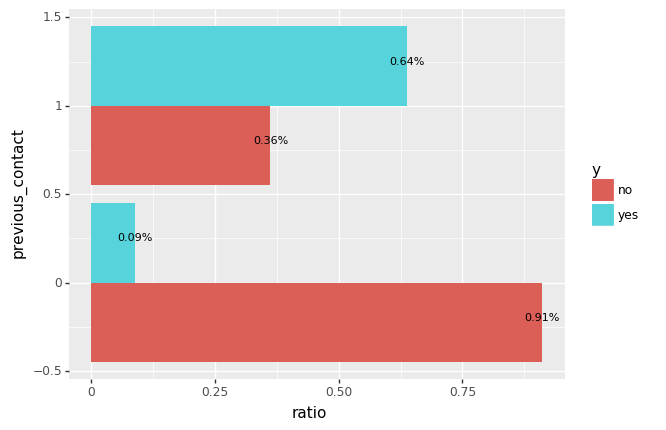

<ggplot: (8789178208183)>


In [28]:
for col in categorical_features:
    plot_group_ratio(df, col)

In [29]:
# we can exclude day of week 
# 1) it doesn't make sense
# 2) ratios are almost the same

categorical_features_lst = ['job',
                        'marital',
                        'education',
                        'default',
                        'housing',
                        'loan',
                        'contact',
                        'month',
#                         'day_of_week',
                        'poutcome',
                        'previous_contact']
categorical_features = df[categorical_features_lst].columns

In [30]:
print(categorical_features)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'previous_contact'], dtype='object')


##### Ordinal Features

In [31]:
ordinal_features_lst = ['default', 'housing', 'loan', 'poutcome']
for col in ordinal_features_lst:
    print(col, df[col].unique())

default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
poutcome ['nonexistent' 'success' 'failure']


In [32]:
ordinal_features = df[ordinal_features_lst].columns

##### Nominal Features

In [33]:
nominal_features_lst = [c for c in categorical_features if c not in ordinal_features]
nominal_features = df[nominal_features_lst].columns
print(nominal_features)

Index(['job', 'marital', 'education', 'contact', 'month', 'previous_contact'], dtype='object')


In [34]:
ordinal_features = df[ordinal_features_lst].columns

### Check for Null values

In [35]:
df.isnull().sum()

age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
previous_contact    0
dtype: int64

In [36]:
for c in df.select_dtypes(include=['object']).drop(['y'], axis=1).columns:
    print(c, len(df[df[c]=='unknown']))

job 313
marital 67
education 1558
default 8085
housing 885
loan 885
contact 0
month 0
day_of_week 0
poutcome 0


###  Correlation Matrix

(8, 0)

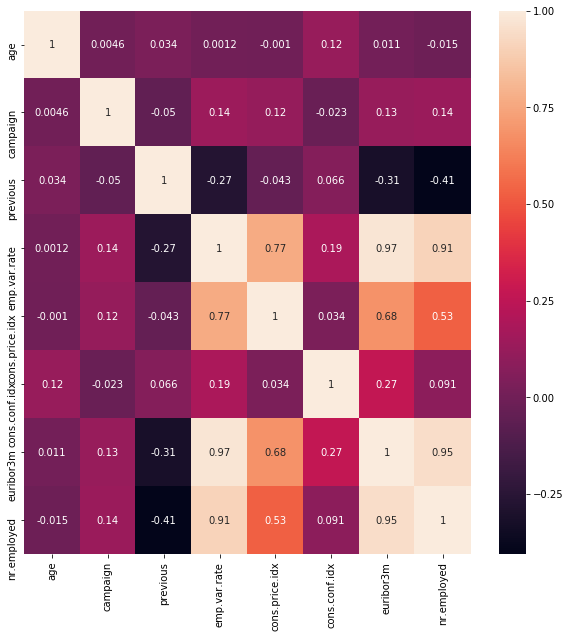

In [37]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df[numeric_features].corr(method='pearson'), annot=True)
ax.set_ylim(8, 0)


In [38]:
# exclude euribor3m from numeric_features because of high correlation
print(numeric_features)
numeric_features_lst = ['age',
                    'campaign',
                    'previous',
                    'emp.var.rate',
                    'cons.price.idx',
                    'cons.conf.idx',
#                     'euribor3m',
                    'nr.employed']
numeric_features = df[numeric_features_lst].columns
print(numeric_features)

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')
Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'], dtype='object')


(7, 0)

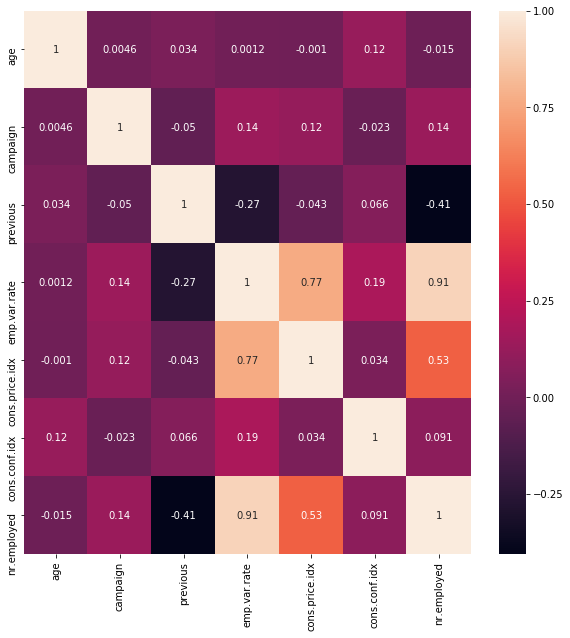

In [39]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df[numeric_features].corr(method='pearson'), annot=True)
ax.set_ylim(7, 0)

### Check balance/imbalance 

In [40]:
df['y'].value_counts()/df['y'].count()

no     0.889198
yes    0.110802
Name: y, dtype: float64

In [41]:
le = LabelEncoder()
df['y_dummy'] = le.fit_transform(df['y'])

In [42]:
# sns.pairplot(df, hue='y', palette="Set2", height=1.5)

In [43]:
# for i, col in enumerate(categorical_features):
#     temp = df['y_dummy'].groupby(df[col]).mean().reset_index()
#     plt.figure(i)
#     plt.figure(figsize=[df[col].nunique(),4])
#     g = sns.barplot(x=col, y= 'y_dummy', data=temp,palette="Set2")
#     g.set_xticklabels(g.get_xticklabels(), rotation=45)

## Model

### preparing the data for the mdeoling

In [45]:
df.shape

(37066, 23)

#### Spilit to test/train

In [46]:
# code for split
from sklearn.model_selection import train_test_split

response_varibale = ['y']
selected_features = [c for c in df.columns if c in nominal_features or c in ordinal_features or c in numeric_features]
X = df[selected_features]
y = df[response_varibale]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, stratify=y  ,test_size=0.25, random_state=0)

print(X.shape, X.shape)
print(X_train_df.shape, y_train_df.shape)
print(X_test_df.shape, y_test_df.shape)

(37066, 17) (37066, 17)
(27799, 17) (27799, 1)
(9267, 17) (9267, 1)


#### Over Sampling

In [47]:
# code for Over sampling


train = pd.concat([X_train_df, y_train_df], axis=1)


# Divide by class
train_yes = train[train.y == 'yes']
train_no = train[train.y == 'no']

train_no_count = len(train_no)
train_yes_count = len(train_yes)


train_yes_over_sampled = train_yes.sample(train_no_count, replace=True)
train_over_sampled = pd.concat([train_no, train_yes_over_sampled], axis=0)

X_train_over_sampled = train_over_sampled[selected_features]
y_train_over_sampled = train_over_sampled[response_varibale]


print(train_over_sampled.y.value_counts())

print('train_no_count : ', train_no_count)
print('test_no_count : ', train_yes_count)
print(X_train_over_sampled.shape)
print(y_train_over_sampled.shape)

no     24719
yes    24719
Name: y, dtype: int64
train_no_count :  24719
test_no_count :  3080
(49438, 17)
(49438, 1)


#### Binarizing lables

In [48]:
from sklearn.preprocessing import LabelBinarizer 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train_df)
y_test = lb.fit_transform(y_test_df)
y_train_over_sampled = lb.fit_transform(y_train_over_sampled)

#### Creating Pipeline

In [49]:
# Target encoding varables

import category_encoders as ce
# X_train.head()
enc = ce.TargetEncoder(cols=['job', 'education', 'month']).fit(X_train_df, y_train)

X_train_encoded = enc.transform(X_train_df, y_train)
X_test_encoded = enc.transform(X_test_df)

X_train_over_sampled_encoded = enc.transform(X_train_over_sampled)



In [50]:
# redefining columns
#numeric_features = [c for c in df.select_dtypes(include=['number']).columns if c not in ['y_dummy','duration']]
print('numeric_features:', numeric_features)

#categorical_features = df.select_dtypes(include=['object']).drop(['y'], axis=1).columns
print('categorical_features :', categorical_features)

ordinal_features = [c for c in categorical_features if c in ['default', 'housing', 'loan', 'poutcome']]
print('ordinal_features :', ordinal_features)

target_encoding_features = [c for c in categorical_features if c in ['job', 'education', 'month']]
print('target_encoding_features :', target_encoding_features)

nominal_features = [c for c in categorical_features if c not in ordinal_features and c not in target_encoding_features]
print('nominal_features :', nominal_features)

numeric_features: Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'], dtype='object')
categorical_features : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'previous_contact'], dtype='object')
ordinal_features : ['default', 'housing', 'loan', 'poutcome']
target_encoding_features : ['job', 'education', 'month']
nominal_features : ['marital', 'contact', 'previous_contact']


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce


# transformation for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# transformation for nominal features
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unkown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# transformation for ordinal transformation
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unkown')),
    ('ordinal', OrdinalEncoder([['yes','unknown','no'],
                                ['yes','unknown','no'],
                                ['yes','unknown','no'],
                                ['failure','nonexistent', 'success']])),
    ('scaler', MinMaxScaler())
])

# enc = ce.TargetEncoder(cols=['job', 'education']).fit(X_train_df, y_train)

# target_encoding = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='unkown')),
#     ('target_encoder', enc),
#     ('scaler', MinMaxScaler())
# ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features),
#         ('enc', target_encoding, target_encoding_features),
    ])

In [52]:
X_train = preprocessor.fit_transform(X_train_encoded)
X_train_over_sampled = preprocessor.fit_transform(X_train_over_sampled_encoded)

X_test = preprocessor.fit_transform(X_test_encoded)

In [86]:
X_train_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,previous_contact
36229,35,0.070206,single,0.106564,no,yes,no,cellular,0.101446,1,0,nonexistent,-2.9,92.963,-40.8,5076.2,0
19945,52,0.078461,married,0.106564,no,no,yes,cellular,0.097870,7,0,nonexistent,1.4,93.444,-36.1,5228.1,0
12075,58,0.102564,married,0.096343,unknown,yes,yes,telephone,0.101446,1,0,nonexistent,1.4,94.465,-41.8,5228.1,0
16711,36,0.078461,divorced,0.108682,no,no,no,cellular,0.084759,2,0,nonexistent,1.4,93.918,-42.7,5228.1,0
31819,36,0.070206,married,0.079095,no,no,no,cellular,0.062188,2,0,nonexistent,-1.8,92.893,-46.2,5099.1,0


In [53]:
print(X_train.shape)

(27799, 19)


### Model Evaluation Metrics

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from scikitplot.helpers import cumulative_gain_curve
import matplotlib.pyplot as plt

class ModelEval:
    def __init__(self, X_validation=X_test, y_validation=y_test):
        self.X_validation = X_validation
        self.y_validation = y_validation
    
    def __call__(self, model):
        self.eval(model)
        
    def scores(self, model):
        y_pred = model.predict(self.X_validation)
        y_true = self.y_validation
        y_score = model.predict_proba(self.X_validation)[:,1]
        
        f1 = f1_score(y_true=y_true, y_pred=y_pred)
        accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        recall = recall_score(y_true=y_true, y_pred=y_pred)
        precision = precision_score(y_true=y_true, y_pred=y_pred)
        auc_score = roc_auc_score(y_true=y_true, y_score=y_score) 
        res = {'precision': precision, 'recall': recall, 'accuracy': accuracy, 'f1': f1, 'auc': auc_score}
        return res
    
    def eval(self, model):
        res = self.scores(model)
        for k, v in res.items():
            print('%s : %0.3f' %(k, v))
        
        
        
    def roc(self, model):
        y_pred = model.predict(self.X_validation)
        y_true = self.y_validation
        y_score = model.predict_proba(self.X_validation)[:,1]
        
        fpr, tpr, threshold = roc_curve(y_true=y_true, y_score=y_score)
        area_under_curve = roc_auc_score(y_true=y_true, y_score=y_score) 
        
        res = {'fpr': fpr, 'tpr' : tpr, 'threshold' : threshold, 'auc': area_under_curve}
        return res
        
    def gain(self, model):
        y_pred = model.predict(self.X_validation)
        y_true = self.y_validation
        y_score = model.predict_proba(self.X_validation)[:,1]
        
        percentages, gains = cumulative_gain_curve(y_true=y_true, y_score=y_score)
        res = {'percentages': percentages, 'gains':gains}
        return res
    
    def plot_roc(self, model):
        fig = plt.figure()
        roc = self.roc(model)
        fpr = roc['fpr']
        tpr = roc['tpr']
        auc = roc['auc']
        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
        plt.plot(fpr, tpr, lw=1, alpha=0.8, label='AUC = %0.3f)' % (auc))
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
#         return fig
    
    def plot_gain(self, model):
        fig = plt.figure()
        g = self.gain(model)
        gains = g['gains']
        percentages = g['percentages']

        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
        plt.plot(percentages, gains, lw=1, alpha=0.8, label='Gain Positive Class)')
        plt.xlabel('Percentages')
        plt.ylabel('Gains')
        plt.title('Gain Chart')
        plt.legend(loc="lower right")
#         return fig
    
# evaluation based on train data set
model_eval_train = ModelEval(X_validation=X_train, y_validation=y_train)

# evaluation based on test data set
model_eval_test = ModelEval(X_validation=X_test, y_validation=y_test)

### Fitting Models

#### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(class_weight='balanced') 
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
model_eval_test(logmodel)

precision : 0.282
recall : 0.644
accuracy : 0.779
f1 : 0.392
auc : 0.773


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
stk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


param_grid = {'penalty': ['l1', 'l2'],
              'C': np.logspace(0, 4, 10)}

logmodel_grid = GridSearchCV(logmodel, param_grid, n_jobs= -1, cv=stk_fold, scoring='roc_auc')
logmodel_grid.fit(X_train, y_train)  
print(logmodel_grid.best_params_)    
print(logmodel_grid.best_score_)

{'C': 1.0, 'penalty': 'l1'}
0.7868505207388732


In [58]:
model_eval_test(logmodel_grid.best_estimator_)

precision : 0.282
recall : 0.644
accuracy : 0.779
f1 : 0.392
auc : 0.773


In [101]:
model_eval_train(logmodel_grid.best_estimator_)

precision : 0.290
recall : 0.675
accuracy : 0.781
f1 : 0.406
auc : 0.789


#### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

model_eval_test(dt)

precision : 0.231
recall : 0.390
accuracy : 0.789
f1 : 0.291
auc : 0.626


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


param_grid = {'max_depth': [i for i in range(4,20)] + [None]}
stk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


dt_grid = GridSearchCV(dt, param_grid, n_jobs= -1, cv=stk_fold, scoring='f1')
                  
dt_grid.fit(X_train, y_train)  
print(dt_grid.best_params_)    
print(dt_grid.best_score_)

{'max_depth': 5}
0.49172585636619776


In [61]:
# evaluating model in test data
model_eval_test(dt_grid.best_estimator_)

precision : 0.404
recall : 0.549
accuracy : 0.860
f1 : 0.465
auc : 0.772


In [102]:
model_eval_train(dt_grid.best_estimator_)

precision : 0.423
recall : 0.595
accuracy : 0.865
f1 : 0.494
auc : 0.802


#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

model_eval_test(rfc)

precision : 0.333
recall : 0.343
accuracy : 0.851
f1 : 0.338
auc : 0.699


In [63]:
param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [4,8, None]}

rfc_grid = GridSearchCV(rfc, param_grid, n_jobs=-1, scoring='roc_auc', cv=10, verbose=2, refit=True)
rfc_grid.fit(X_train, y_train)
                  
model_eval_test(rfc_grid.best_estimator_) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  90 | elapsed:    9.6s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:   28.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   29.1s finished


precision : 0.360
recall : 0.594
accuracy : 0.838
f1 : 0.448
auc : 0.786


In [64]:
rfc_grid.best_params_

{'max_depth': 8, 'n_estimators': 1000}

In [103]:
model_eval_train(rfc_grid.best_estimator_)

precision : 0.386
recall : 0.646
accuracy : 0.847
f1 : 0.483
auc : 0.832


#### XGBoost

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10, predictor='gpu_predictor')
xgb.fit(X_train, y_train)
model_eval_test(xgb)

precision : 0.595
recall : 0.301
accuracy : 0.900
f1 : 0.400
auc : 0.775


In [67]:
param_grid = {'learning_rate': [0.01 , 0.1], #so called `eta` value
              'max_depth': [6, 10, 20],
              'n_estimators': [100, 1000], #number of trees
              }


xgb_grid = GridSearchCV(xgb, param_grid, n_jobs=-1, 
                   cv=10, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

xgb_grid.fit(X_train, y_train)
model_eval_test(xgb_grid.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 out of 120 | elapsed:  1.4min remaining:   33.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.7min finished


precision : 0.662
recall : 0.282
accuracy : 0.904
f1 : 0.396
auc : 0.781


In [104]:
model_eval_train(xgb_grid.best_estimator_)

precision : 0.696
recall : 0.302
accuracy : 0.908
f1 : 0.421
auc : 0.810


In [68]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}

#### Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight


grad_boost = GradientBoostingClassifier()

sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

grad_boost.fit(X_train, y_train, sample_weight=sample_weight)
model_eval_test(grad_boost)

precision : 0.365
recall : 0.592
accuracy : 0.841
f1 : 0.452
auc : 0.784


In [70]:
grad_boost.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [71]:
param_grid = {
    "n_estimators":[100, 500, 1000]
    }

grad_boost_grid = GridSearchCV(grad_boost, param_grid, cv=4, n_jobs=-1, verbose=2, refit=True, scoring='roc_auc')

grad_boost_grid.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    7.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.2s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [72]:
model_eval_test(grad_boost_grid.best_estimator_)

precision : 0.670
recall : 0.299
accuracy : 0.906
f1 : 0.413
auc : 0.782


In [105]:
model_eval_train(grad_boost_grid.best_estimator_)

precision : 0.667
recall : 0.301
accuracy : 0.906
f1 : 0.415
auc : 0.810


In [73]:
grad_boost_grid.best_params_

{'n_estimators': 100}

### Model Selection

In [76]:
models = {'Logistic Regression': logmodel_grid.best_estimator_,
          'Decision Tree': dt_grid.best_estimator_,
          'Random Forest': rfc_grid.best_estimator_,
          'XGBoost': xgb_grid.best_estimator_,
          'Gradient Boosting': grad_boost}

In [77]:
# make a data frame for model selection
clf, f1, accuracy, recall, precision, area_under_curve = [], [], [], [], [], []
for name, model in models.items():
    res = model_eval_test.scores(model)
    clf.append(name)
    f1.append(res['f1'])
    accuracy.append(res['accuracy'])
    recall.append(res['recall'])
    precision.append(res['precision'])
    area_under_curve.append(res['auc'])
    
evaluation_df = pd.DataFrame({'clf': clf,
                              'f1': f1,
                              'accuracy': accuracy,
                              'recall': recall,
                              'precision': precision,
                              'auc': area_under_curve})  

In [78]:
evaluation_df.sort_values(by=['auc'], ascending=False)

,clf,f1,accuracy,recall,precision,auc
2,Random Forest,0.448035,0.837812,0.593963,0.359670,0.786087
4,Gradient Boosting,0.451709,0.840725,0.592016,0.365165,0.784245
3,XGBoost,0.395904,0.904500,0.282376,0.662100,0.780604
0,Logistic Regression,0.391936,0.778677,0.643622,0.281756,0.772988
1,Decision Tree,0.465347,0.860149,0.549172,0.403722,0.772313


#### Precision Recall Curve

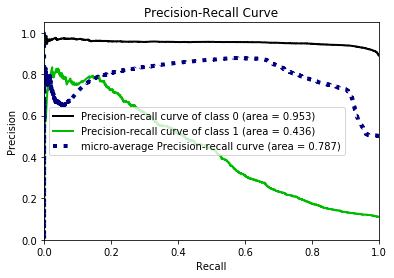

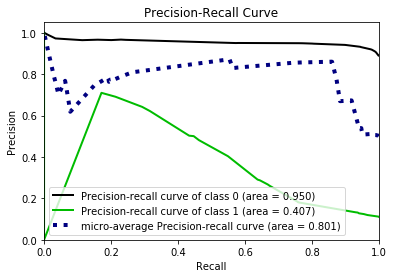

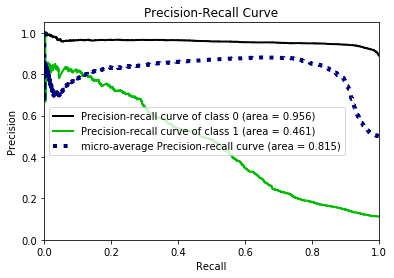

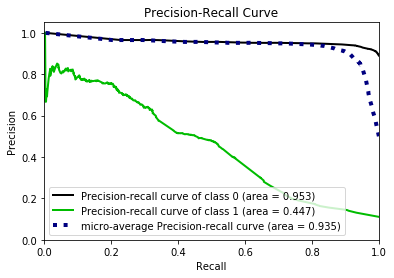

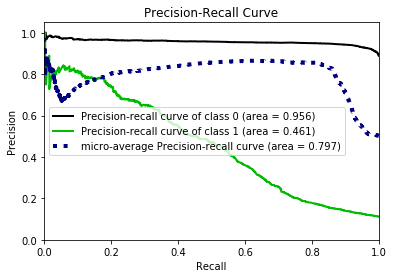

In [79]:
import scikitplot as skplt
for name, model in models.items():

    y_probas = model.predict_proba(X_test)
    skplt.metrics.plot_precision_recall(y_test, y_probas)


#### ROC

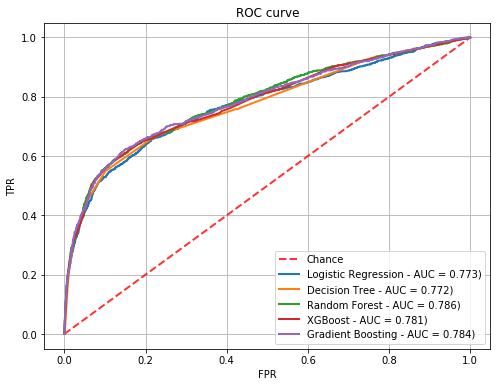

In [80]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
for name, model in models.items():
    roc = model_eval_test.roc(model)
    fpr = roc['fpr']
    tpr = roc['tpr']
    auc = roc['auc']
    plt.plot(fpr, tpr, lw=2, alpha=1, label='%s - AUC = %0.3f)' % (name, auc))
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Gain Chart

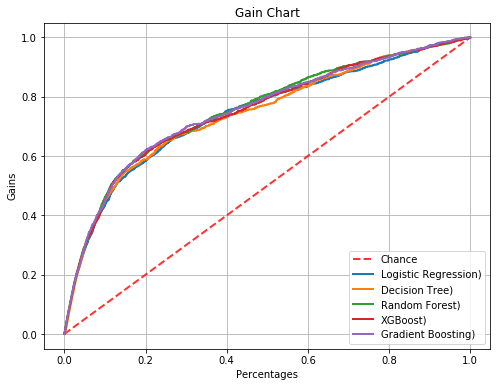

In [81]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
for name, model in models.items():
    g = model_eval_test.gain(model)
    gains = g['gains']
    percentages = g['percentages']
    plt.plot(percentages, gains, lw=2, alpha=1, label='%s)' % (name))
    
plt.xlabel('Percentages')
plt.ylabel('Gains')
plt.title('Gain Chart')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Lift Chart

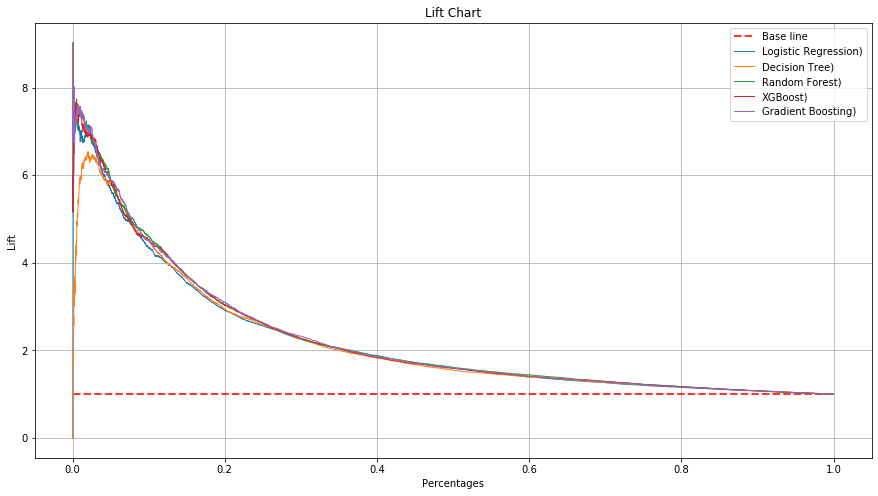

In [82]:
plt.figure(figsize=(15, 8))
plt.plot([0, 1], [1, 1], linestyle='--', lw=2, color='r', label='Base line', alpha=.8)
for name, model in models.items():
    g = model_eval_test.gain(model)
    gains = g['gains']
    percentages = g['percentages']
    plt.plot(percentages, gains/percentages, lw=1, alpha=1, label='%s)' % (name))
    
plt.xlabel('Percentages')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

#### ROC Cost Analysis

In [83]:
model_eval_test(xgb_grid.best_estimator_)

precision : 0.662
recall : 0.282
accuracy : 0.904
f1 : 0.396
auc : 0.781


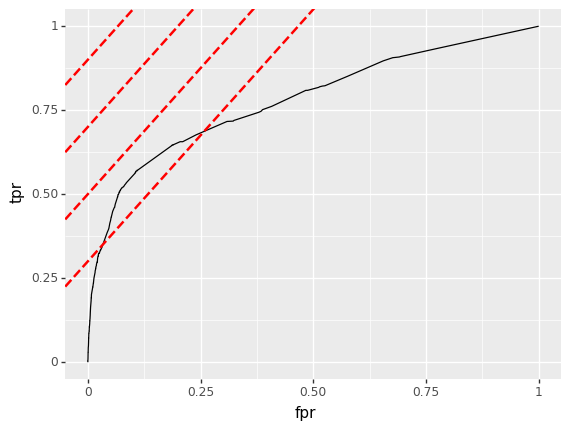

<ggplot: (-9223363247844668647)>


In [84]:
roc = model_eval_test.roc(xgb_grid.best_estimator_)
fpr = roc['fpr']
tpr = roc['tpr']
auc = roc['auc']

data = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
f = ggplot(data) + geom_line(aes(x='fpr', y='tpr')) 
f += geom_abline(intercept =0.30, slope = 1.5, color="red", linetype="dashed", size=1)
f += geom_abline(intercept =0.50, slope = 1.5, color="red", linetype="dashed", size=1)
f += geom_abline(intercept =0.70, slope = 1.5, color="red", linetype="dashed", size=1)
f += geom_abline(intercept =0.90, slope = 1.5, color="red", linetype="dashed", size=1)
print(f)